### Logistic Regression
#### Iris Flower Classification

Load Dataset

In [4]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

Split Traing and Test Set and Perform Scaling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape of training set X: ", X_train.shape)
print("Shape of testing set X: ", X_test.shape)

Shape of training set X:  (105, 4)
Shape of testing set X:  (45, 4)


Build Logistic Model

In [9]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logistic_model = LogisticRegression(multi_class='auto', solver='liblinear', random_state=42)

# Model training
logistic_model.fit(X_train, y_train)

# Model prediction
y_pred = logistic_model.predict(X_test)

/opt/conda/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Evaluation

In [10]:
train_accuracy = logistic_model.score(X_train, y_train)
test_accuracy = logistic_model.score(X_test, y_test)

print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)

Training accuracy:  0.8857142857142857
Testing accuracy:  0.9111111111111111


> From the results, it can be observed that the model achieves nearly 90% accuracy on both the training set and the test set.

Confusion Matrix for Test Set

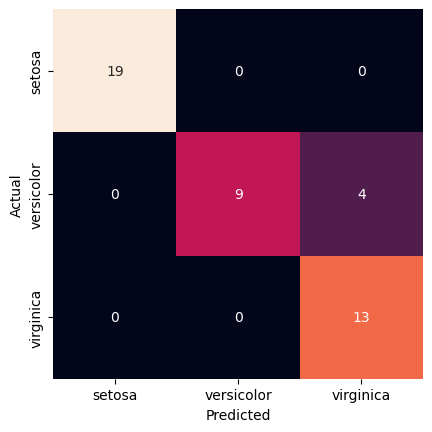

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(actual, pred, labels):
    # Use pd.crosstab() to generate the confusion matrix
    confusion_matrix = pd.crosstab(actual, pred,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    # Use seaborn to draw a heatmap
    sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels,
                square=True, annot=True, cbar=False)

# Call the function with label names
y_label_names = ['setosa', 'versicolor', 'virginica']
plot_confusion_matrix(y_test, y_pred, labels=y_label_names)


> From the results, it can be seen that the prediction accuracy for Setosa and Virginica is very high, with all samples correctly classified. However, there are some misclassifications within Versicolor, where the model incorrectly classified four samples as Virginica. To improve the model, one could consider studying the distinguishing features between these two flower types more deeply, or using more data and features to enhance the model’s ability to differentiate between them.